In [1]:
import pandas as pd
import numpy as np

In [ ]:
## Examining prevalence of each city as a function of number of stores and total sales

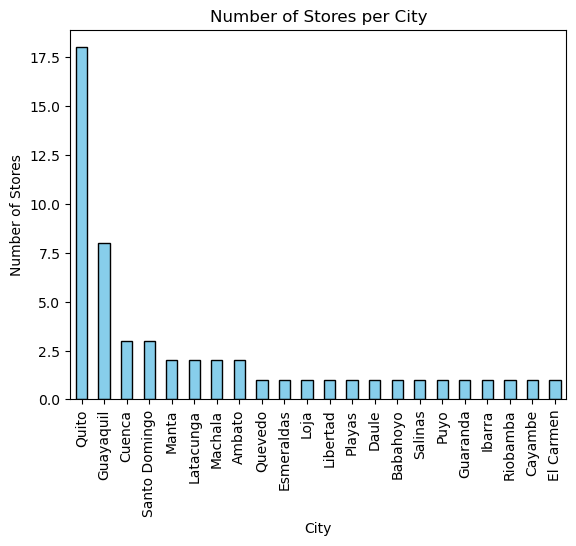

In [9]:
# Find number of stores per city
stores = pd.read_csv('stores.csv')
storeByCity = stores['city'].value_counts()

import matplotlib.pyplot as plt

# Plotting a bar chart
storeByCity.plot(kind='bar', color='skyblue', edgecolor='black')

# Adding labels and title
plt.xlabel('City')
plt.ylabel('Number of Stores')
plt.title('Number of Stores per City')

# Display the plot
plt.show()

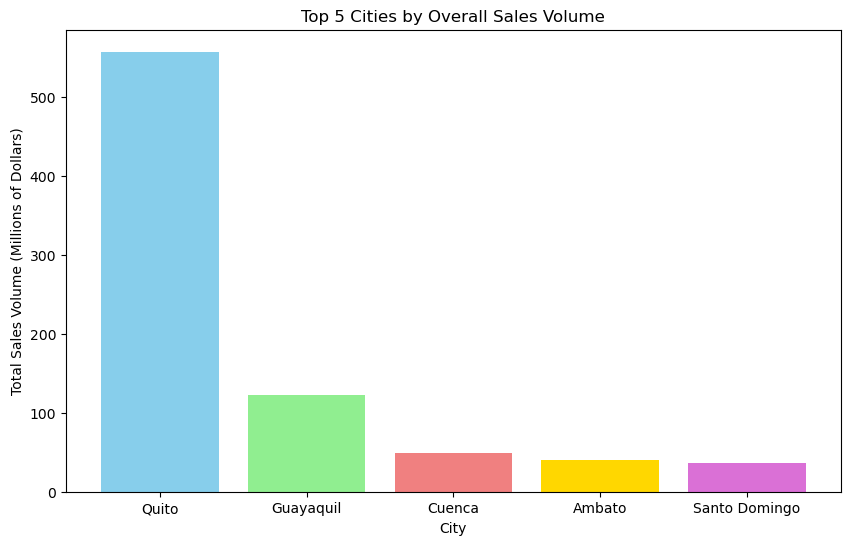

In [41]:
# Top 5 cities in overall sales volume 
sales = pd.read_csv('train.csv')

# Merge sales and stores DataFrames on 'store_nbr'
merged_data = pd.merge(sales, stores, on='store_nbr')

# Convert the date column to a datetime object
merged_data['date'] = pd.to_datetime(merged_data['date'])

# Extract the year from the date and create a new column
merged_data['year'] = merged_data['date'].dt.year

# Calculate total sales for each city
total_sales_by_city = pd.DataFrame(merged_data.groupby('city')['sales'].sum().sort_values(ascending=False))

# # Convert sales to millions of dollars
total_sales_by_city['sales_in_millions'] = total_sales_by_city['sales'] / 1_000_000

# Select the top 5 cities
top_cities = total_sales_by_city.head(5)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(top_cities.index, top_cities['sales_in_millions'], color=['skyblue', 'lightgreen', 'lightcoral', 'gold', 'orchid'])
plt.xlabel('City')
plt.ylabel('Total Sales Volume (Millions of Dollars)')
plt.title('Top 5 Cities by Overall Sales Volume')
plt.show()

<Figure size 1200x800 with 0 Axes>

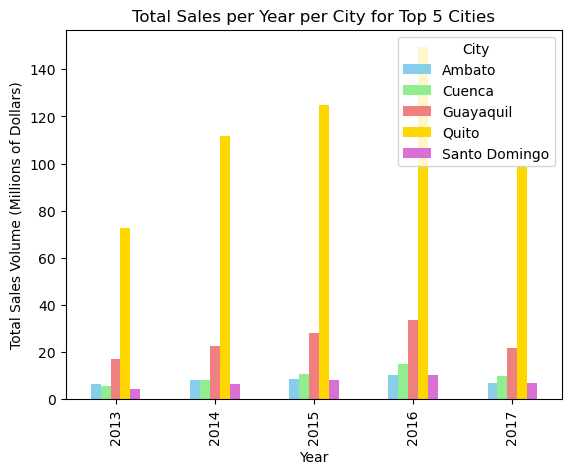

In [52]:
# Group by city, year, and calculate the total sales for each group
total_sales_by_city_year = merged_data.groupby(['city', 'year'])['sales'].sum().reset_index()

# Convert sales to millions of dollars
total_sales_by_city_year['sales_in_millions'] = total_sales_by_city_year['sales'] / 1_000_000

# Select the top 5 cities
top_cities = total_sales_by_city.reset_index()['city'].head(5)

# # Filter the total_sales_by_city_year DataFrame for the top cities
top_cities_sales_by_year = total_sales_by_city_year[total_sales_by_city_year['city'].isin(top_cities)]

# # Pivot the table for easier plotting
pivot_table = top_cities_sales_by_year.pivot_table(index='year', columns='city', values='sales_in_millions')

# # Plotting the bar chart
plt.figure(figsize=(12, 8))
pivot_table.plot(kind='bar', color=['skyblue', 'lightgreen', 'lightcoral', 'gold', 'orchid'])
plt.xlabel('Year')
plt.ylabel('Total Sales Volume (Millions of Dollars)')
plt.title('Total Sales per Year per City for Top 5 Cities')
plt.legend(title='City')
plt.show()

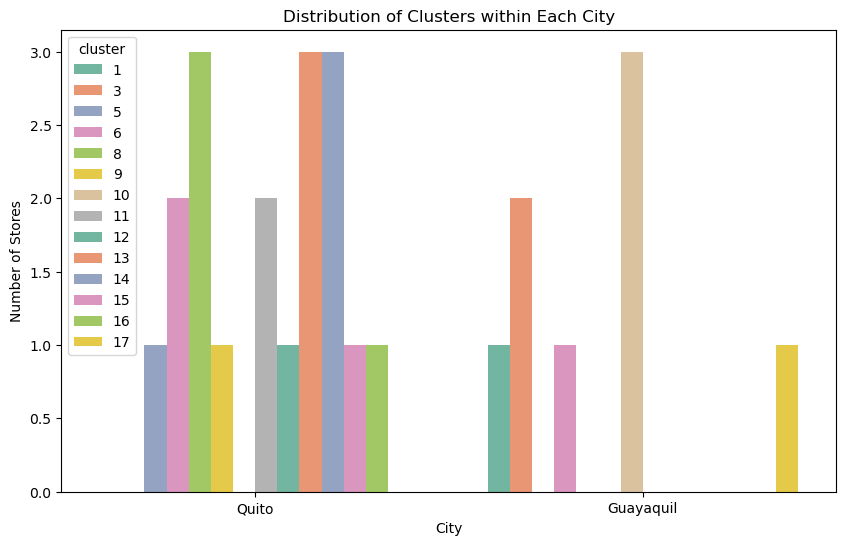

In [143]:
# Distribution of cluster in Quito and Guayaquil
filtered_stores = stores[stores['city'].isin(['Quito', 'Guayaquil'])]

# Creating a count plot using seaborn
plt.figure(figsize=(10, 6))
sns.countplot(x='city', hue='cluster', data=filtered_stores, palette='Set2')

# Adding labels and title
plt.xlabel('City')
plt.ylabel('Number of Stores')
plt.title('Distribution of Clusters within Two Biggest Cities')

# Display the plot
plt.show()

/var/folders/zq/8sbmz8694l97rf1srm69f29r0000gn/T/ipykernel_6034/610410364.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['date'] = pd.to_datetime(filtered_data['date'])
/var/folders/zq/8sbmz8694l97rf1srm69f29r0000gn/T/ipykernel_6034/610410364.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['year'] = filtered_data['date'].dt.year


<Figure size 1400x800 with 0 Axes>

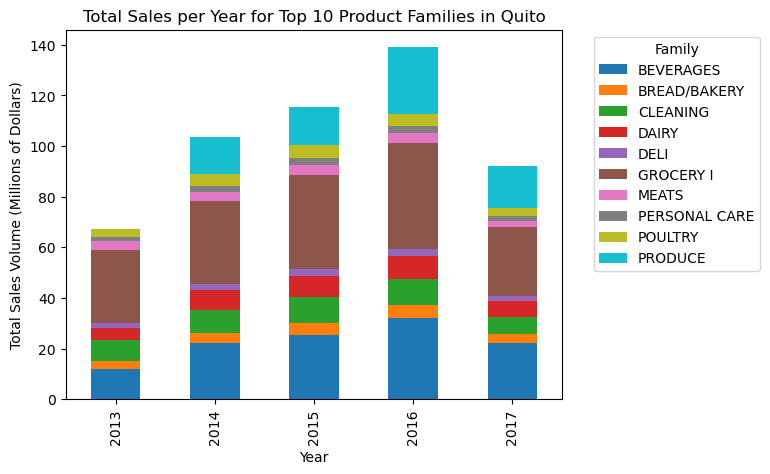

In [63]:
## Quito Sales Analysis ##
filtered_data = merged_data[merged_data['city'] == 'Quito']

# Convert the date column to a datetime object
filtered_data['date'] = pd.to_datetime(filtered_data['date'])

# Extract the year from the date and create a new column
filtered_data['year'] = filtered_data['date'].dt.year

# Group by year and family, and calculate the total sales for each group
total_sales_by_year_family = filtered_data.groupby(['year', 'family'])['sales'].sum().reset_index()

# Convert sales to millions of dollars
total_sales_by_year_family['sales_in_millions'] = total_sales_by_year_family['sales'] / 1_000_000

# Calculate the total sales volume for each family
total_sales_by_family = total_sales_by_year_family.groupby('family')['sales_in_millions'].sum().reset_index()

# Select the top 10 families based on total sales volume
top_families = total_sales_by_family.nlargest(10, 'sales_in_millions')['family']

# Filter the total_sales_by_year_family DataFrame for the top families
top_families_sales_by_year = total_sales_by_year_family[total_sales_by_year_family['family'].isin(top_families)]

# Pivot the table for easier plotting
pivot_table = top_families_sales_by_year.pivot_table(index='year', columns='family', values='sales_in_millions')

# Plotting the bar chart
plt.figure(figsize=(14, 8))
pivot_table.plot(kind='bar', stacked=True)
plt.xlabel('Year')
plt.ylabel('Total Sales Volume (Millions of Dollars)')
plt.title('Total Sales per Year for Top 10 Product Families in Quito')
plt.legend(title='Family', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

<Figure size 1200x800 with 0 Axes>

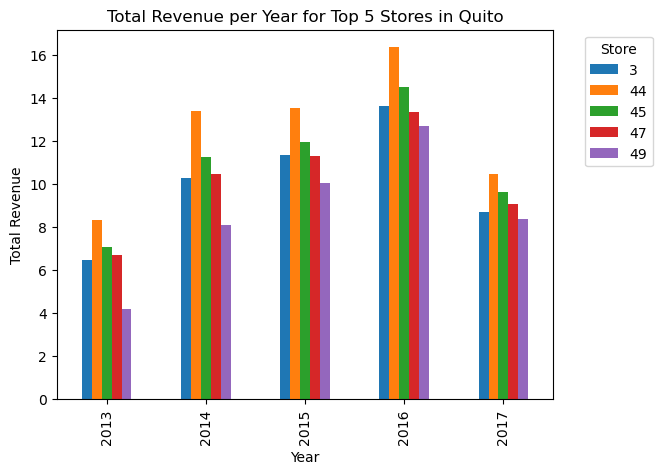

In [139]:
# Top 5 cities in overall sales volume 
sales = pd.read_csv('train.csv')

# Merge sales and stores DataFrames on 'store_nbr'
merged_data = pd.merge(sales, stores, on='store_nbr')

# Convert the date column to a datetime object
merged_data['date'] = pd.to_datetime(merged_data['date'])

# Extract the year from the date and create a new column
merged_data['year'] = merged_data['date'].dt.year

quito_data = merged_data[merged_data['city'] == 'Quito']

# Calculate total revenue per store per year
total_revenue_per_store_per_year = merged_data.groupby(['store_nbr', 'year'])['sales'].sum().reset_index()

total_revenue_per_store_per_year['sales in millions'] = total_revenue_per_store_per_year['sales'] / 1000000

# Identify the top 10 stores based on overall sales
top_5_stores = total_revenue_per_store_per_year.groupby('store_nbr')['sales in millions'].sum().nlargest(5).index

# Filter data for the top 10 stores
top_5_stores_data = total_revenue_per_store_per_year[total_revenue_per_store_per_year['store_nbr'].isin(top_5_stores)]

# Pivot the table for easier plotting
pivot_table = top_5_stores_data.pivot_table(index='year', columns='store_nbr', values='sales in millions')

# Plotting the bar chart
plt.figure(figsize=(12, 8))
pivot_table.plot(kind='bar', stacked=False)
plt.xlabel('Year')
plt.ylabel('Total Revenue')
plt.title('Total Revenue per Year for Top 5 Stores in Quito')
plt.legend(title='Store', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

